In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('intel_electronics_review.csv')

df

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5,67,True,"09 18, 1999",AAP7PPBU72QFM,0151004714,{'Format:': ' Hardcover'},D. C. Carrad,This is the best novel I have read in 2 or 3 y...,A star is born,937612800,NaN
1,3,5,True,"10 23, 2013",A2E168DTVGE6SV,0151004714,{'Format:': ' Kindle Edition'},Evy,"Pages and pages of introspection, in the style...",A stream of consciousness novel,1382486400,NaN
2,5,4,False,"09 2, 2008",A1ER5AYS3FQ9O3,0151004714,{'Format:': ' Paperback'},Kcorn,This is the kind of novel to read when you hav...,I'm a huge fan of the author and this one did ...,1220313600,NaN
3,5,13,False,"09 4, 2000",A1T17LMQABMBN5,0151004714,{'Format:': ' Hardcover'},Caf Girl Writes,What gorgeous language! What an incredible wri...,The most beautiful book I have ever read!,968025600,NaN
4,3,8,True,"02 4, 2000",A3QHJ0FXK33OBE,0151004714,{'Format:': ' Hardcover'},W. Shane Schmidt,I was taken in by reviews that compared this b...,A dissenting view--In part.,949622400,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,5,3,True,"04 4, 2014",A2DX28UI6GWL7O,B00008Y0U5,NaN,Donald,I got this Power Tank because I didn't want to...,The Power Tank is a great accessory.,1396569600,NaN
149996,4,NaN,True,"04 3, 2014",A1U7RNEQX9DLZV,B00008Y0U5,NaN,JeffNJ,Its a basic 12V battery source with car adapte...,Good Quality with alot of features,1396483200,NaN
149997,4,NaN,True,"03 28, 2014",A1MYL611XLASZG,B00008Y0U5,NaN,Senior Moment,Item arrived on time in original box. No exter...,"So far, works as advertised",1395964800,NaN
149998,5,NaN,True,"03 20, 2014",A3FVGL3Q5S7U21,B00008Y0U5,NaN,Howard,Powers the telescope all night and then fully ...,Thumbs up,1395273600,NaN


In [3]:
df.isna().sum()

overall                0
vote              121976
verified               0
reviewTime             0
reviewerID             0
asin                   0
style              60687
reviewerName          41
reviewText            20
summary               17
unixReviewTime         0
image             148436
dtype: int64

In [4]:
df.dtypes

overall            int64
vote              object
verified            bool
reviewTime        object
reviewerID        object
asin              object
style             object
reviewerName      object
reviewText        object
summary           object
unixReviewTime     int64
image             object
dtype: object

In [5]:
df = df.drop(columns='image')

In [6]:
df['vote'].unique()

array(['67', '5', '4', '13', '8', nan, '2', '12', '3', '46', '23', '25',
       '15', '9', '37', '16', '6', '7', '14', '27', '71', '77', '20',
       '103', '19', '10', '11', '39', '22', '40', '593', '301', '58',
       '307', '26', '17', '227', '33', '49', '203', '21', '97', '18',
       '57', '162', '260', '24', '146', '161', '51', '74', '44', '32',
       '75', '30', '36', '28', '43', '41', '81', '62', '59', '116', '34',
       '60', '47', '55', '316', '79', '122', '29', '66', '171', '379',
       '35', '129', '132', '115', '86', '111', '45', '38', '85', '139',
       '90', '54', '48', '83', '448', '112', '135', '50', '65', '89',
       '72', '73', '109', '100', '31', '234', '96', '195', '52', '64',
       '76', '68', '114', '42', '143', '94', '61', '110', '221', '124',
       '149', '80', '88', '131', '56', '93', '121', '233', '294', '78',
       '92', '207', '95', '229', '158', '643', '209', '419', '123', '82',
       '69', '101', '148', '107', '128', '181', '188', '102', '291',
 

In [7]:
df['vote'].mode()

0    2
Name: vote, dtype: object

In [8]:
df['vote'] = df['vote'].fillna(df['vote'].mode()[0])

In [9]:
df['style'].unique()

array(["{'Format:': ' Hardcover'}", "{'Format:': ' Kindle Edition'}",
       "{'Format:': ' Paperback'}", ..., "{'Size:': ' 12x60'}",
       "{'Color:': ' Center Focus, Black'}",
       "{'Color:': ' Individual Focus, Olive'}"], dtype=object)

In [10]:
df['style'].mode()

0    {'Package Type:': ' Standard Packaging'}
Name: style, dtype: object

In [11]:
df['style'] = df['style'].fillna(df['style'].mode()[0])

In [12]:
df['reviewerName'].unique()

array(['D. C. Carrad', 'Evy', 'Kcorn', ..., 'cloquet collision',
       'Michael Weasner', 'Randy Wolf'], dtype=object)

In [13]:
df['reviewerName'].mode()

0    Amazon Customer
Name: reviewerName, dtype: object

In [14]:
df['reviewerName'] = df['reviewerName'].fillna(df['reviewerName'].mode()[0])

In [15]:
df['reviewText'].unique()

array(['This is the best novel I have read in 2 or 3 years.  It is everything that fiction should be -- beautifully written, engaging, well-plotted and structured.  It has several layers of meanings -- historical, family,  philosophical and more -- and blends them all skillfully and interestingly.  It makes the American grad student/writers\' workshop "my parents were  mean to me and then my professors were mean to me" trivia look  childish and silly by comparison, as they are.\nAnyone who says this is an  adolescent girl\'s coming of age story is trivializing it.  Ignore them.  Read this book if you love literature.\nI was particularly impressed with  this young author\'s grasp of the meaning and texture of the lost world of  French Algeria in the 1950\'s and \'60\'s...particularly poignant when read in  1999 from another ruined and abandoned French colony, amid the decaying  buildings of Phnom Penh...\nI hope the author will write many more books  and that her publishers will bring h

In [16]:
df['reviewText'].mode()

0    good
Name: reviewText, dtype: object

In [17]:
df['reviewText'] = df['reviewText'].fillna(df['reviewText'].mode()[0])

In [18]:
df['summary'].unique()

array(['A star is born', 'A stream of consciousness novel',
       "I'm a huge fan of the author and this one did not disappoint",
       ..., 'The Power Tank is a great accessory.',
       'Good Quality with alot of features',
       'So far, works as advertised'], dtype=object)

In [19]:
df['summary'].mode()

0    Five Stars
Name: summary, dtype: object

In [20]:
df['summary'] = df['summary'].fillna(df['summary'].mode()[0])

In [21]:
df.isna().sum()

overall           0
vote              0
verified          0
reviewTime        0
reviewerID        0
asin              0
style             0
reviewerName      0
reviewText        0
summary           0
unixReviewTime    0
dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
lab_enc = LabelEncoder()

In [24]:
df.dtypes

overall            int64
vote              object
verified            bool
reviewTime        object
reviewerID        object
asin              object
style             object
reviewerName      object
reviewText        object
summary           object
unixReviewTime     int64
dtype: object

In [25]:
df['vote'] = lab_enc.fit_transform(df['vote'])

df['verified'] = lab_enc.fit_transform(df['verified'])

df['reviewTime'] = lab_enc.fit_transform(df['reviewTime'])

df['reviewerID'] = lab_enc.fit_transform(df['reviewerID'])

df['asin'] = lab_enc.fit_transform(df['asin'])

df['style'] = lab_enc.fit_transform(df['style'])

df['reviewerName'] = lab_enc.fit_transform(df['reviewerName'])

df['reviewText'] = lab_enc.fit_transform(df['reviewText'])

df['summary'] = lab_enc.fit_transform(df['summary'])

In [26]:
df

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,5,273,1,4598,89444,1,595,14678,101118,3390,937612800
1,3,235,1,5263,40551,1,596,22569,76505,3397,1382486400
2,5,206,0,4644,11854,1,601,38994,101285,39380,1220313600
3,5,35,0,4870,23611,1,595,10834,112689,66404,968025600
4,3,293,1,989,79462,1,595,72497,54712,2218,949622400
...,...,...,...,...,...,...,...,...,...,...,...
149995,5,169,1,2133,40471,3087,791,19395,36516,65740,1396569600
149996,4,99,1,2095,24590,3087,791,33678,65475,23951,1396483200
149997,4,99,1,1488,18587,3087,791,63615,65238,61986,1395964800
149998,5,99,1,1340,70968,3087,791,28546,77917,69290,1395273600


In [27]:
df.describe()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05
mean,4.329333,110.298000,0.849840,3270.721800,54869.080080,1533.903520,945.709347,41986.266227,66939.453393,41782.153167,1.359136e+09
std,1.139059,41.917662,0.357229,1991.635519,31677.268283,855.943817,472.321686,25545.145287,39052.228282,25276.697977,1.246919e+08
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.292320e+08
25%,4.000000,99.000000,1.000000,1471.000000,27438.000000,853.000000,791.000000,19545.000000,31995.750000,21491.000000,1.313107e+09
50%,5.000000,99.000000,1.000000,3286.000000,54844.500000,1570.000000,791.000000,41388.000000,67336.500000,35402.500000,1.399334e+09
75%,5.000000,99.000000,1.000000,5008.000000,82313.000000,2264.000000,1304.000000,63634.250000,101831.250000,64671.250000,1.443312e+09
max,5.000000,316.000000,1.000000,6669.000000,109769.000000,3095.000000,1983.000000,88131.000000,131072.000000,90037.000000,1.526170e+09


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

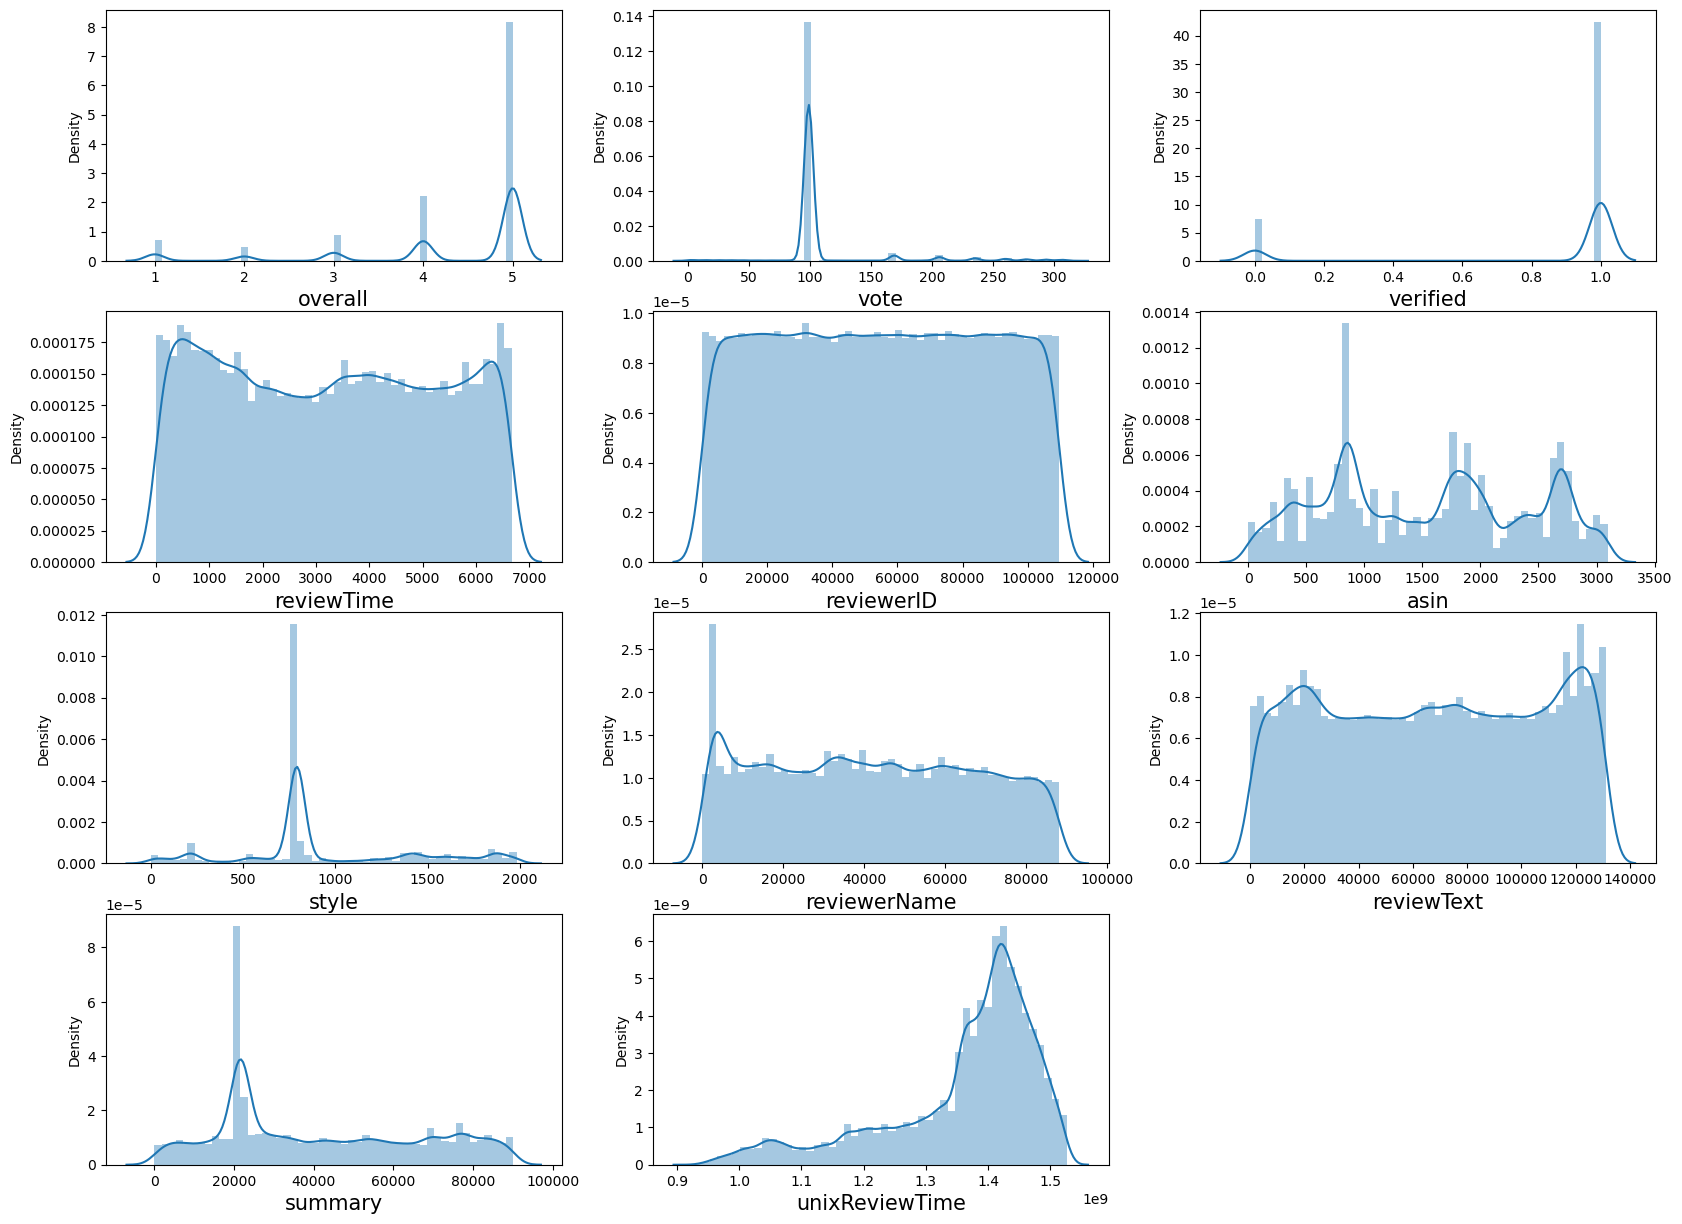

In [29]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in df:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

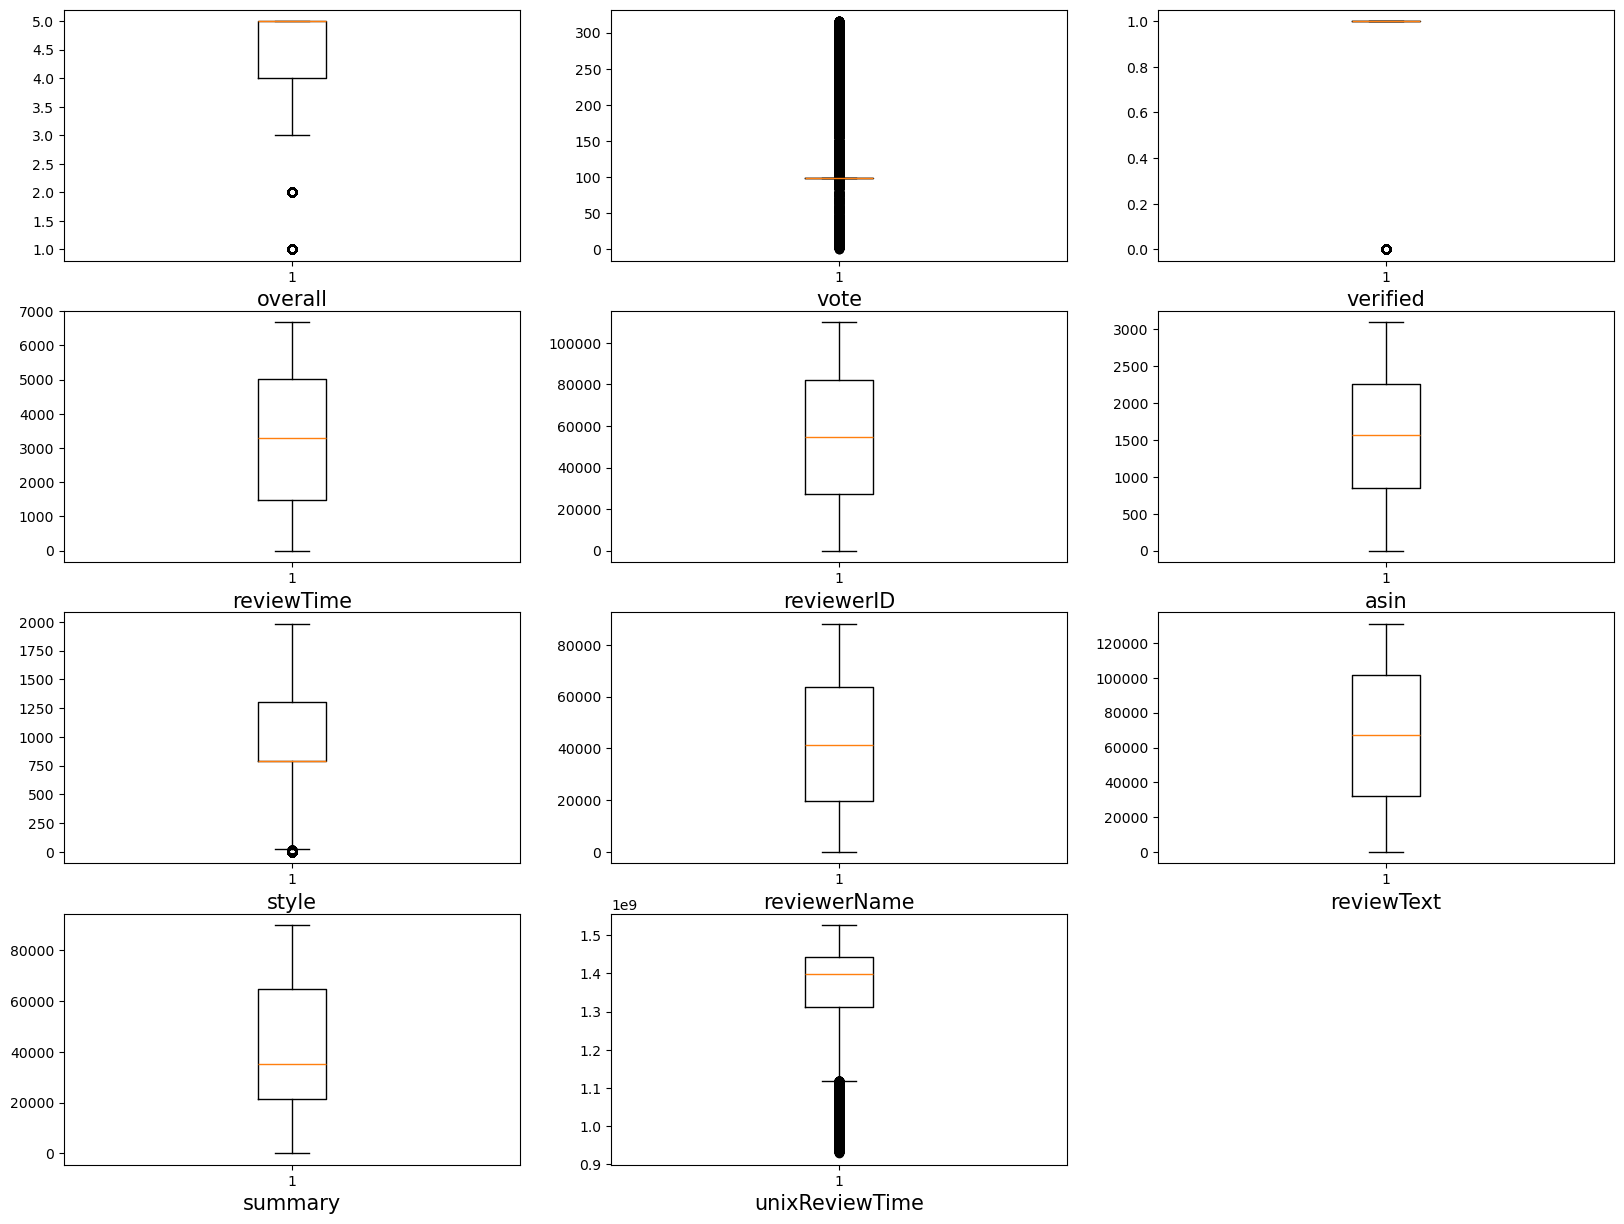

In [30]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in df:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [31]:
df.vote.value_counts()

vote
99     129485
169      4277
206      2857
235      1957
260      1481
        ...  
145         1
245         1
146         1
0           1
205         1
Name: count, Length: 317, dtype: int64

In [32]:
q1 = df.quantile(0.25)

q3 = df.quantile(0.75)

iqr = q3 - q1

In [33]:
vote_max = (q3.vote + (1.5 * iqr.vote))

vote_max

99.0

In [34]:
index = np.where(df['vote'] > vote_max)

index

(array([     0,      1,      2, ..., 149984, 149985, 149995], dtype=int64),)

In [35]:
df = df.drop(df.index[index])

df.shape

(133374, 11)

In [36]:
vote_min = (q1.vote - (1.5 * iqr.vote))

vote_min

99.0

In [37]:
index = np.where(df['vote'] < vote_min)

index

(array([     0,     12,     53, ..., 133306, 133325, 133327], dtype=int64),)

In [38]:
df = df.drop(df.index[index])

df.shape

(129485, 11)

In [39]:
unix_max = (q3.unixReviewTime + (1.5 * iqr.unixReviewTime))

unix_max

1638619200.0

In [40]:
index = np.where(df['unixReviewTime'] > unix_max)

index

(array([], dtype=int64),)

In [41]:
unix_min = (q1.unixReviewTime - (1.5 * iqr.unixReviewTime))

unix_min

1117800000.0

In [42]:
index = np.where(df['unixReviewTime'] < unix_min)

index

(array([  4911,   4912,   4979, ..., 129293, 129294, 129317], dtype=int64),)

In [43]:
df = df.drop(df.index[index])

df.shape

(125824, 11)

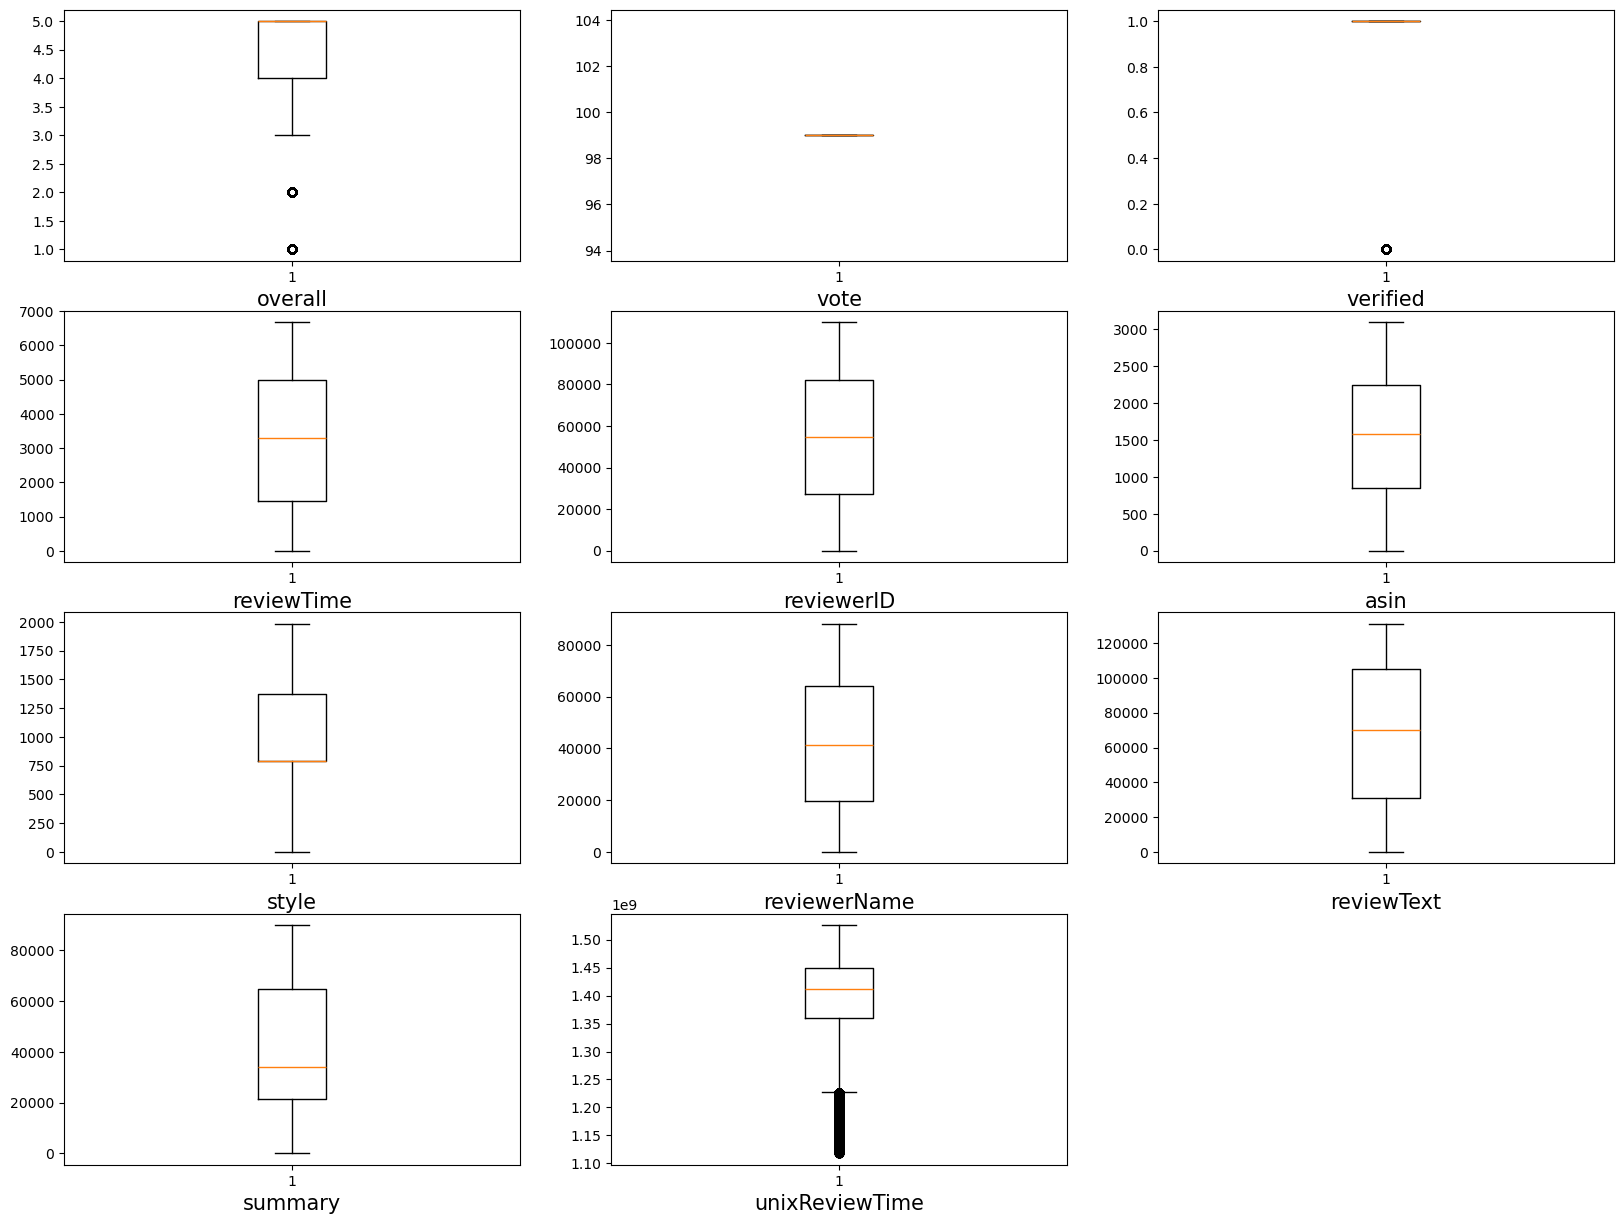

In [44]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in df:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

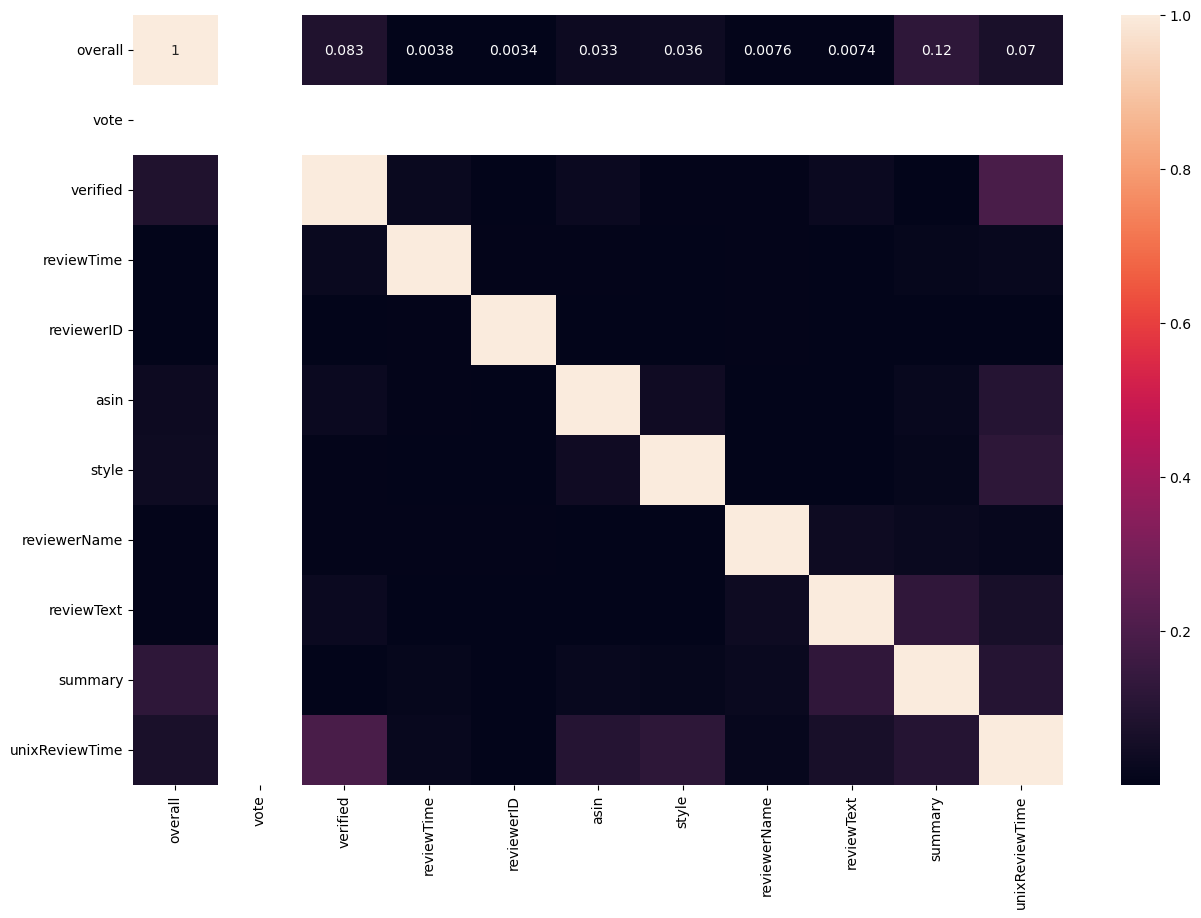

In [45]:
corr = df.corr().abs()

plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)
plt.show()

In [46]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [47]:
x = df.drop(columns='verified')

y = df['verified']

In [48]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30)

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [52]:
lr = LogisticRegression()

lr.fit(x_train,y_train)

lr_pred = lr.predict(x_test)

In [53]:
accuracy = accuracy_score(y_test,lr_pred)
accuracy

0.9075712620536187

In [54]:
confusion_matrix(y_test,lr_pred)

array([[   14,  3486],
       [    3, 34245]], dtype=int64)

In [55]:
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

knn_pred = knn.predict(x_test)

In [56]:
accuracy = accuracy_score(y_test,knn_pred)

accuracy

0.9018226131185758

In [57]:
confusion_matrix(y_test,knn_pred)

array([[  236,  3264],
       [  442, 33806]], dtype=int64)

In [58]:
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

dt_pred = dt.predict(x_test)

In [59]:
accuracy = accuracy_score(y_test,dt_pred)
accuracy

0.8535021723005193

In [60]:
confusion_matrix(y_test,dt_pred)

array([[  945,  2555],
       [ 2975, 31273]], dtype=int64)

In [61]:
rf = RandomForestClassifier()

rf.fit(x_train,y_train)

rf_pred = rf.predict(x_test)

In [62]:
accuracy = accuracy_score(y_test,rf_pred)

accuracy

0.9110416445904419

In [63]:
confusion_matrix(y_test,rf_pred)

array([[  255,  3245],
       [  113, 34135]], dtype=int64)

In [ ]:
# import pickle 

# pickle.dump(lr,open('lr_classifier','wb'))